# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
def jaccard_similarity(d1,d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return inter/union

In [3]:
d1 = "Think like a man of action and act like man of thought."
d2 = "Try not to become a man of success but rather try to become a man of value."
d3 = "Give me liberty, of give me death."

print(jaccard_similarity(d1,d2))
print(jaccard_similarity(d1,d3))
print(jaccard_similarity(d2,d3))

0.2222222222222222
0.13333333333333333
0.11764705882352941


In [4]:
tiv = TfidfVectorizer()
corpus = [d1,d2,d3]

tfidf = tiv.fit_transform(corpus)

print(cosine_similarity(tfidf[0],tfidf[1]))
print(cosine_similarity(tfidf[0],tfidf[2]))
print(cosine_similarity(tfidf[1],tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


## 한국어 형태소 분석기 설치

In [5]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 45.8 MB/s 


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [6]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [945 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InR

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [7]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [8]:
raw = [x.decode() for x in raw[1:10000]]

reviews=[]
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [9]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [10]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [11]:
word2vec = Word2Vec(reviews,min_count=5)
word2vec

In [12]:
word2vec.most_similar('영화')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('작품', 0.9790545701980591),
 ('듯', 0.9675735235214233),
 ('이야기', 0.9671096205711365),
 ('마음', 0.9634959697723389),
 ('모습', 0.9627618193626404),
 ('인간', 0.9545847177505493),
 ('아름다운', 0.9524036645889282),
 ('현실', 0.9510834217071533),
 ('보석', 0.9501527547836304),
 ('모든', 0.9496655464172363)]

* t-sne을 이용한 단어 벡터 시각화

In [13]:
tsne = TSNE(n_components=2)
tsne

TSNE()

In [14]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-0.05274722, -0.14098452,  0.04473644, ..., -0.02675482,
        -0.10419714, -0.10711464],
       [-0.14853697, -0.39246437,  0.13908006, ...,  0.08668017,
        -0.13456017, -0.39118823],
       [ 0.25090963, -0.44547215,  0.29289487, ..., -0.20338479,
        -0.6074874 , -0.2735475 ],
       ...,
       [-0.01333988, -0.02480182,  0.00625039, ...,  0.00436125,
        -0.01056726, -0.01622736],
       [-0.02240192, -0.02907824,  0.02381205, ...,  0.01695601,
        -0.02093696, -0.02754393],
       [-0.01505811, -0.02502943,  0.01045975, ..., -0.00250963,
        -0.01422843, -0.03144567]], dtype=float32)

In [15]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index=vocab, columns = ['x','y'])
df[0:10]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,x,y
어릴,-19.243303,27.026409
때,-54.491222,-3.955389
보,-59.660728,-5.080691
고,-58.908539,-3.767724
지금,-56.363571,-2.484414
다시,-57.873779,-2.753709
봐도,-58.166328,-1.673615
재밌,-63.988583,5.195230
어요,-63.367996,6.553750
ㅋㅋ,-64.191818,8.764071


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


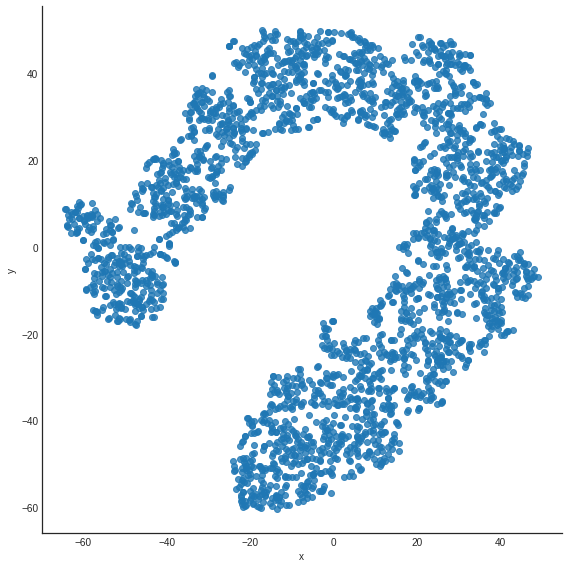

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x','y',data = df, fit_reg = False, size=8)
plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [17]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([4, 0, 0, ..., 1, 1, 1])

In [18]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-19.243303,27.026409,4
때,-54.491222,-3.955389,0
보,-59.660728,-5.080691,0
고,-58.908539,-3.767724,0
지금,-56.363571,-2.484414,0
다시,-57.873779,-2.753709,0
봐도,-58.166328,-1.673615,0
재밌,-63.988583,5.195230,0
어요,-63.367996,6.553750,0
ㅋㅋ,-64.191818,8.764071,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


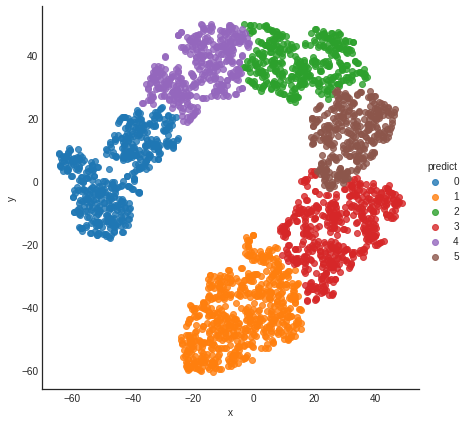

In [19]:
sns.lmplot('x','y', data = results,fit_reg=False, size=6, hue='predict')
plt.show()

#### average

In [20]:
avg = AgglomerativeClustering(n_clusters=6,linkage='average')
predict = avg.fit_predict(df)
predict

array([2, 4, 4, ..., 1, 1, 1])

In [21]:
results = df
results['predict']=predict
results[0:10]

,x,y,predict
어릴,-19.243303,27.026409,2
때,-54.491222,-3.955389,4
보,-59.660728,-5.080691,4
고,-58.908539,-3.767724,4
지금,-56.363571,-2.484414,4
다시,-57.873779,-2.753709,4
봐도,-58.166328,-1.673615,4
재밌,-63.988583,5.195230,4
어요,-63.367996,6.553750,4
ㅋㅋ,-64.191818,8.764071,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


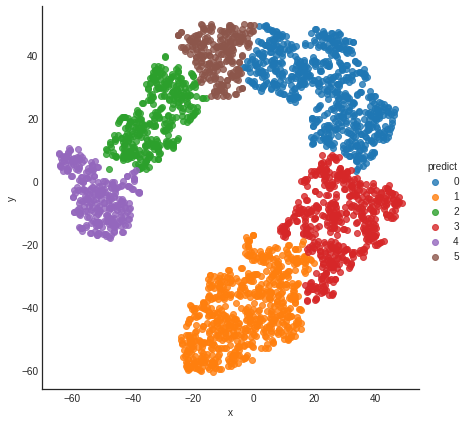

In [22]:
sns.lmplot('x','y',data = results, fit_reg=False, size=6,hue='predict')
plt.show()

#### complete

In [23]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(df)
predict

array([2, 5, 5, ..., 3, 3, 3])

In [24]:
results= df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-19.243303,27.026409,2
때,-54.491222,-3.955389,5
보,-59.660728,-5.080691,5
고,-58.908539,-3.767724,5
지금,-56.363571,-2.484414,5
다시,-57.873779,-2.753709,5
봐도,-58.166328,-1.673615,5
재밌,-63.988583,5.195230,5
어요,-63.367996,6.553750,5
ㅋㅋ,-64.191818,8.764071,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


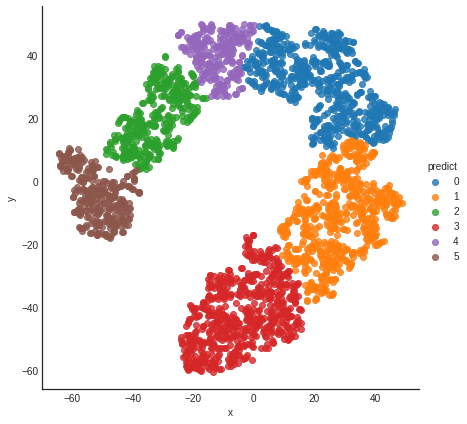

In [25]:
sns.lmplot('x','y',data = results, fit_reg=False, size=6,hue='predict')
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [26]:
from scipy.spatial.kdtree import distance_matrix
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,47.024330,51.705262,50.305164,47.516344,48.868897,48.453001,49.877253,48.735185,48.609484,...,71.370431,70.581226,57.025707,85.893761,70.497739,66.864386,74.566913,81.213246,86.750943,83.613277
1,47.024330,0.000000,5.290567,4.421301,2.381062,3.589669,4.325840,13.188392,13.756421,15.996444,...,86.872613,59.769165,80.350681,65.210750,73.747103,52.145449,61.357578,60.090798,68.392389,65.111763
2,51.705262,5.290567,0.000000,1.513166,4.196653,2.933945,3.720403,11.150107,12.210817,14.567369,...,91.643264,63.102352,85.460187,67.231080,77.967338,55.296645,64.394816,62.184262,70.645668,67.423499
3,50.305164,4.421301,1.513166,0.000000,2.850218,1.448776,2.221749,10.302494,11.243647,13.599961,...,91.204720,63.303011,84.766598,67.844781,77.818155,55.555628,64.697979,62.774474,71.195235,67.954408
4,47.516344,2.381062,4.196653,2.850218,0.000000,1.534030,1.976696,10.822095,11.434613,13.704375,...,89.047532,62.146883,82.305946,67.462395,76.075655,54.515178,63.722656,62.351671,70.679553,67.405815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,66.864386,52.145449,55.296645,55.555628,54.515178,55.444683,56.386768,65.325694,65.826483,67.974156,...,48.756219,8.117096,52.876915,19.273058,28.633275,0.000000,9.297167,15.168508,19.911736,16.750719
2635,74.566913,61.357578,64.394816,64.697979,63.722656,64.624458,65.580394,74.539325,75.062659,77.223558,...,46.307972,4.589253,53.427189,14.537731,25.076038,9.297167,0.000000,12.784316,13.136797,10.818418
2636,81.213246,60.090798,62.184262,62.774474,62.351671,62.988245,64.039587,73.005747,73.760366,76.049073,...,59.044592,16.787640,65.932520,5.178785,37.773896,15.168508,12.784316,0.000000,8.663849,5.891542
2637,86.750943,68.392389,70.645668,71.195235,70.679553,71.363712,72.402011,81.388815,82.105782,84.376741,...,56.487384,17.712781,65.493512,4.643041,35.340025,19.911736,13.136797,8.663849,0.000000,3.359636


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

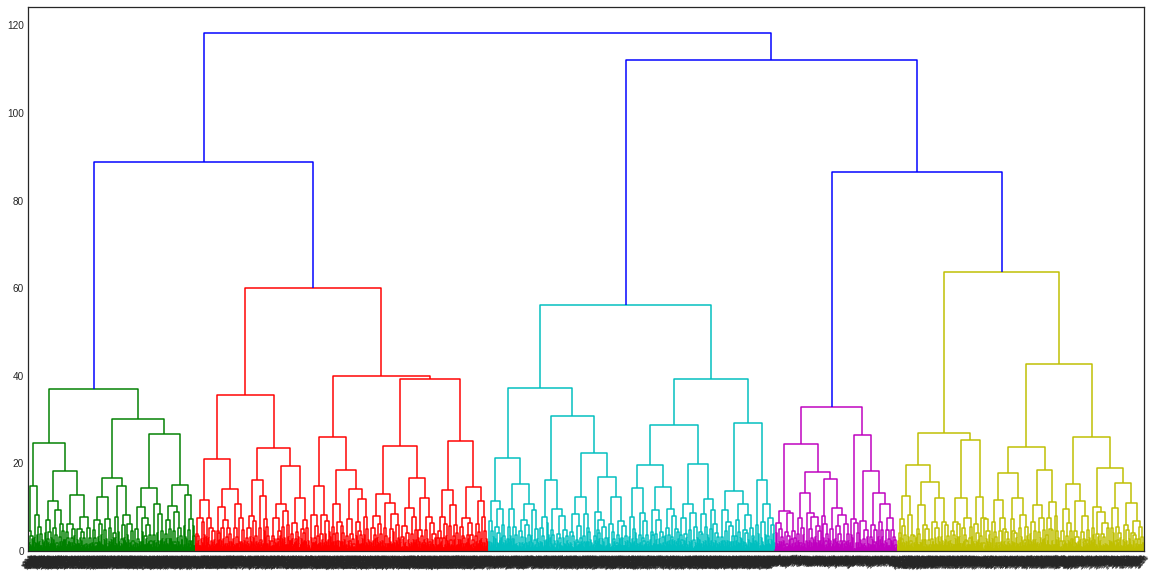

In [27]:
row_clusters = linkage(distmatrix,method='complete')

plt.figure(figsize=(20,10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

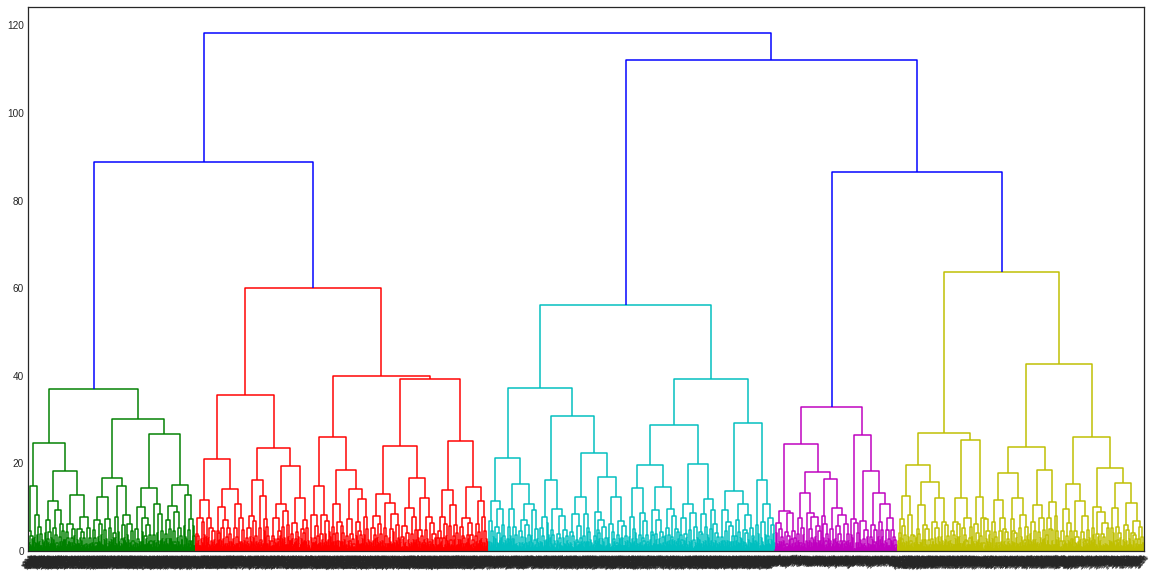

In [28]:
mergings = linkage(df,method='complete')
plt.figure(figsize=(20,10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [30]:
results =df
results['predict']=predict
results[0:10]

,x,y,predict
어릴,-19.243303,27.026409,0
때,-54.491222,-3.955389,0
보,-59.660728,-5.080691,0
고,-58.908539,-3.767724,0
지금,-56.363571,-2.484414,0
다시,-57.873779,-2.753709,0
봐도,-58.166328,-1.673615,0
재밌,-63.988583,5.195230,0
어요,-63.367996,6.553750,0
ㅋㅋ,-64.191818,8.764071,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


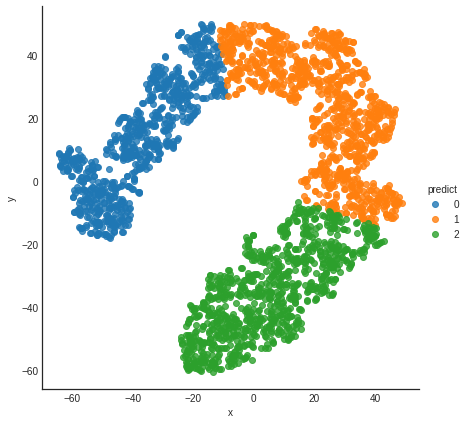

In [31]:
sns.lmplot('x','y',data =results,fit_reg=False, size=6,hue='predict')
plt.show()

### 클러스터 개수 6

In [32]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([4, 1, 1, ..., 5, 5, 5], dtype=int32)

In [33]:
results =df
results['predict']=predict
results[0:10]

,x,y,predict
어릴,-19.243303,27.026409,4
때,-54.491222,-3.955389,1
보,-59.660728,-5.080691,1
고,-58.908539,-3.767724,1
지금,-56.363571,-2.484414,1
다시,-57.873779,-2.753709,1
봐도,-58.166328,-1.673615,1
재밌,-63.988583,5.195230,1
어요,-63.367996,6.553750,1
ㅋㅋ,-64.191818,8.764071,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


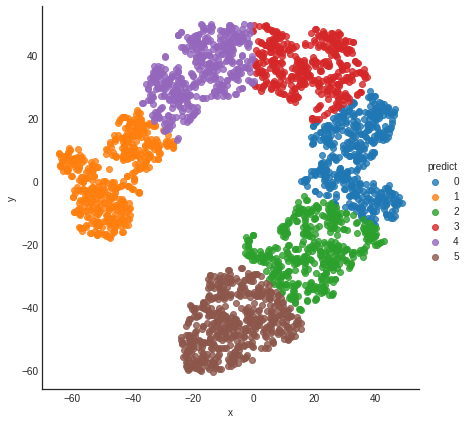

In [34]:
sns.lmplot('x','y',data =results,fit_reg=False, size=6,hue='predict')
plt.show()